

# Business Forecasting

**Business Forecasting** plays a pivotal role in helping businesses predict future sales, expenditures, or revenues using historical data. This approach is fundamental in today's data-driven landscape where informed decision-making sets the stage for competitive advantage and operational success. This article dives deep into how you can leverage Python, a versatile programming language, to perform effective business forecasting.

### Importance of Business Forecasting

Forecasting is indispensable for any business aiming to stay ahead in the competitive market. It enables businesses to predict future trends and customer behaviors based on their historical data. By understanding potential future scenarios, businesses can strategically plan, allocate resources wisely, and mitigate risks effectively.

### Practical Application: Forecasting with Python

To demonstrate the practical application of business forecasting, this article uses real-world data from a major brand's quarterly sales reports. Here, you will learn how to use Python to forecast quarterly revenue, a vital metric for any commercial entity.

### Step-by-Step Forecasting Guide

1. **Data Collection**: The analysis begins with sales data, specifically the quarterly revenue figures.
   
2. **Python Libraries**: I am introduced to several powerful Python libraries that are essential for data analysis and time series forecasting:
   - **Pandas**: for data manipulation and analysis.
   - **Matplotlib**: for creating visualizations to understand data trends.
   - **Statsmodels**: for implementing statistical models, including the Seasonal ARIMA, which is effective for seasonal data.

3. **Building the Forecast Model**:
   - You will learn how to prepare the data and choose the right model parameters (p, d, q), crucial steps for building an effective forecasting model.
   - The Seasonal ARIMA model is used due to its efficacy in handling seasonal variations in time series data.

4. **Forecasting Future Revenue**: The model is then used to predict future quarterly revenues, demonstrating how theoretical models are applied in practical scenarios.

5. **Results Visualization**: Visualization techniques are covered to help you understand and interpret the forecasting outcomes, enabling a visual assessment of both historical performance and future predictions.

### Visualization and Interpretation

The use of graphical representations is emphasized to not only forecast but also visually interpret the data. This ensures that you can easily communicate the results to stakeholders who might not be familiar with statistical details but can appreciate visual trends and patterns.

This guide provides a comprehensive overview of how to perform business forecasting using Python. The emphasis on using historical time series data for forecasting helps businesses in strategic planning and improving future performance. By following this guide, you gain insights into both the theoretical and practical aspects of building a forecasting model using Python, a skill that's highly valued in today's data-centric business environments.

Feel free to explore further and ask questions if you need more detailed explanations or additional examples. This approach not only enhances your understanding but also equips you with the necessary tools to tackle real-world business forecasting challenges.

### Understanding Python Code for Business Forecasting

This guide walks through a Python script designed for business forecasting, specifically using time series analysis to predict quarterly sales data. Here's a breakdown of each step and its purpose in the overall process:

#### Setting Up the Environment

Initially, the script sets up the necessary Python environment by importing various libraries. Each library serves a specific purpose:

- **Pandas**: This library is fundamental for data manipulation and analysis. It provides data structures and operations for manipulating numerical tables and time series.
- **Datetime**: This module supplies classes for manipulating dates and times in both simple and complex ways. It includes functionality to operate on dates and manage intervals through timedelta.
- **Matplotlib**: A popular plotting library in Python, used here to create visualizations. The specific style 'fivethirtyeight' mimics the style of the website FiveThirtyEight, providing a visually appealing, statistically driven graph style.
- **Statsmodels**: This module provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An important feature here is the ARIMA model for time series forecasting.
- **Warnings**: Used to manage warnings across Python programs. It’s not explicitly used in the visible code but is often included to handle possible issues in more complex scripts.

#### Loading and Displaying Data

The data is loaded using pandas' `read_csv` function, which reads data from a specified file path. In this case, the path is to a CSV file containing Adidas’s quarterly sales data. The script then prints this data, allowing you to see what it looks like. This is an essential step for verifying the structure and correctness of the data before moving on to more complex analysis.

#### Time Series Analysis

The imported data is then likely to be used for performing time series analysis, although the specific steps for this aren't included in the shared code snippet. Given the imports and typical use-cases, the following could be involved:

- **Seasonal Decomposition**: Using `seasonal_decompose` from `statsmodels`, this technique could help in understanding the data's underlying patterns such as trend, seasonality, and noise.
- **Partial Autocorrelation Plot (PACF)**: This plot could be created using `plot_pacf` to identify the order of the AR terms in an ARIMA model, which is vital for modeling time series data.
- **ARIMA Model**: Setting up an ARIMA model using the `ARIMA` class from `statsmodels` would typically be the next step, aiming to forecast future points in the series.



By setting up the environment, loading the data, and preparing for in-depth time series analysis, this script lays the groundwork for creating predictive models that can forecast future business performance based on historical data. The specific focus on time series tools in `statsmodels` positions the user to deeply analyze and model complex temporal data effectively.

In [20]:
import pandas as pd
from datetime import date, timedelta
import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import warnings

data = pd.read_csv("C:/Users/anike/OneDrive/Desktop/Projects/Machine Learning/Buissness Forecasting/sales.csv")
print(data)

   Time Period  Revenue
0       2000Q1     1517
1       2000Q2     1248
2       2000Q3     1677
3       2000Q4     1393
4       2001Q1     1558
..         ...      ...
83      2020Q4     5142
84      2021Q1     5268
85      2021Q2     5077
86      2021Q3     5752
87      2021Q4     5137

[88 rows x 2 columns]


The dataset in focus here presents a structured look into Adidas's financial performance over multiple years, specifically from 2000 to 2021. It is organized into two columns: "Time Period" and "Revenue," which help in assessing the company's sales achievements on a quarterly basis. Let’s explore each component of the dataset.


In [21]:
import plotly.graph_objects as go

# Create a bar chart
bar_chart = go.Bar(x=data['Time Period'], y=data['Revenue'], name='Quarterly Revenue')

# Create a trend line using a line chart
trend_line = go.Scatter(x=data['Time Period'], y=data['Revenue'], mode='lines', name='Trend Line')

# Combine both plots
fig = go.Figure(data=[bar_chart, trend_line])

# Customize layout
fig.update_layout(title='Quarterly Sales Revenue of Adidas in Millions',
                  xaxis_title='Time Period',
                  yaxis_title='Revenue (in millions)',
                  template='plotly_white')

# Show the figure
fig.show()


####  Understanding and analyzing the seasonality in time series data such as quarterly sales revenue is crucial for making accurate predictions and strategic business decisions. Seasonality refers to periodic fluctuations that recur over specific time intervals, such as quarters in a year, and recognizing these patterns can help in forecasting future trends. 

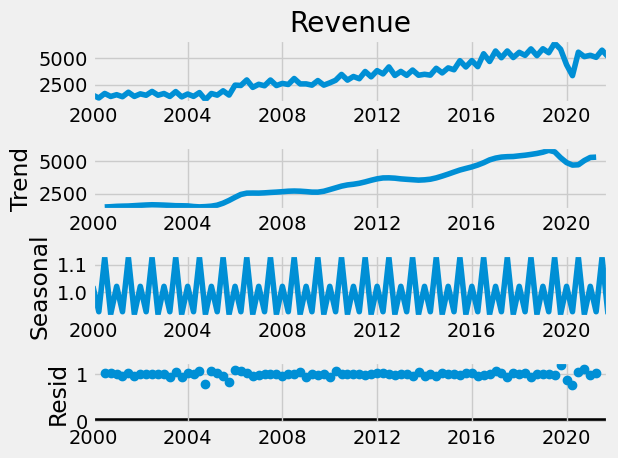

In [22]:
data['Time Period'] = pd.to_datetime(data['Time Period'])
data.set_index('Time Period', inplace=True)

# Seasonal Decompose
result = seasonal_decompose(data['Revenue'], model='multiplicative')
result.plot()

plt.show()

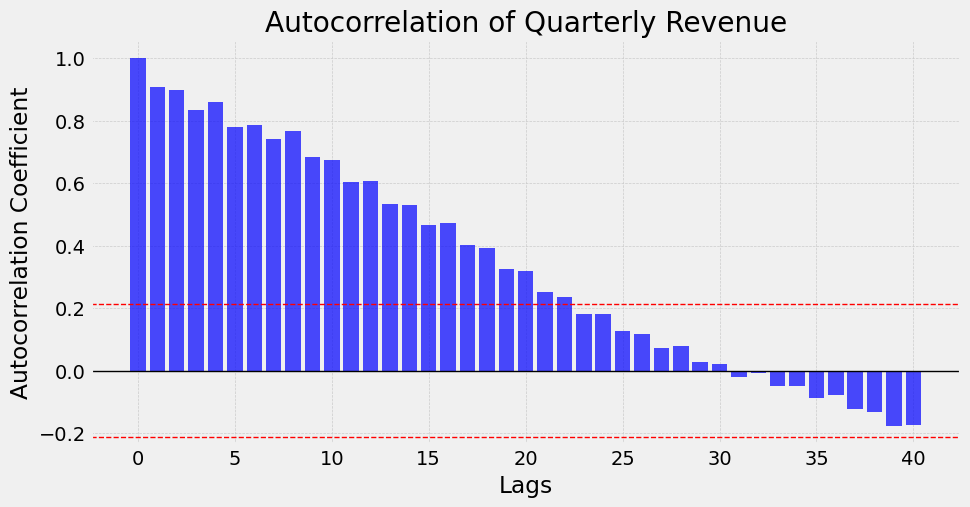

In [23]:
# Compute the autocorrelation factor
acf_values = acf(data['Revenue'], nlags=40)  # Adjust nlags depending on the length of your data

# Create the lag values array for the x-axis
lags = np.arange(len(acf_values))

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(lags, acf_values, color='blue', linewidth=2, alpha=0.7)
plt.title('Autocorrelation of Quarterly Revenue')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation Coefficient')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(0, color='black', linewidth=1)  # Adds a horizontal line at zero for reference
plt.axhline(2/np.sqrt(len(data['Revenue'])), color='red', linestyle='--', linewidth=1)  # Upper confidence bound
plt.axhline(-2/np.sqrt(len(data['Revenue'])), color='red', linestyle='--', linewidth=1)  # Lower confidence bound

plt.show()


## Plotting the PACF:
plot_pacf is used to compute and plot the partial autocorrelation up to the specified number of lags (20 in this case). This function is useful for identifying the order of autoregressive (AR) terms in a time series model.
The lags parameter determines how many lags of the partial autocorrelation function are plotted. This is set to 20 here, but you may adjust this based on the specific needs of your analysis or the length of your time series.

C:\Users\anike\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



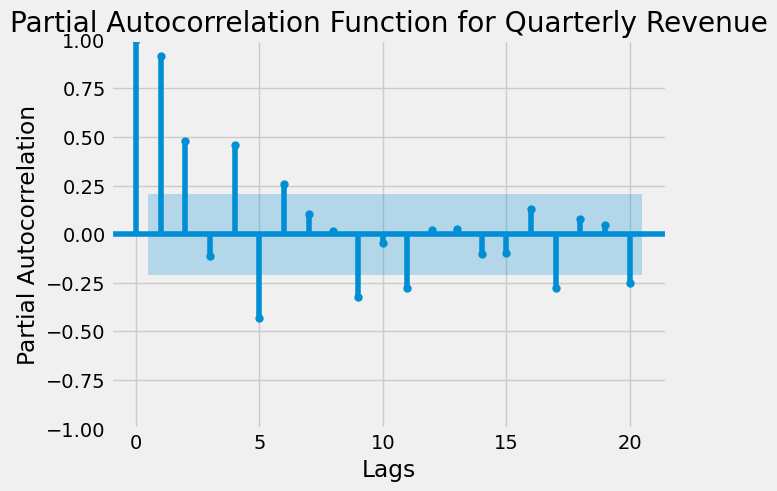

In [24]:
# Plotting PACF
# The 'lags' parameter specifies the number of lags to be included in the plot
plot_pacf(data['Revenue'], lags=20)
plt.title('Partial Autocorrelation Function for Quarterly Revenue')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [25]:
p, d, q = 5, 1, 2
model=sm.tsa.statespace.SARIMAX(data['Revenue'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\Users\anike\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.

C:\Users\anike\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.

C:\Users\anike\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                      
Dep. Variable:                            Revenue   No. Observations:                   88
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -548.521
Date:                            Thu, 02 May 2024   AIC                           1127.041
Time:                                    13:07:11   BIC                           1161.803
Sample:                                01-01-2000   HQIC                          1140.921
                                     - 10-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5793      0.386     -4.091      0.000      -2.336      -0.823
ar.L2         -1.4320      0.580   

In [26]:
predictions = model.predict(len(data), len(data)+7)
print(predictions)

2022-01-01    6079.012820
2022-04-01    5186.348034
2022-07-01    6293.234883
2022-10-01    5752.153087
2023-01-01    5911.940699
2023-04-01    5499.542334
2023-07-01    6389.713043
2023-10-01    5728.830276
Freq: QS-OCT, Name: predicted_mean, dtype: float64


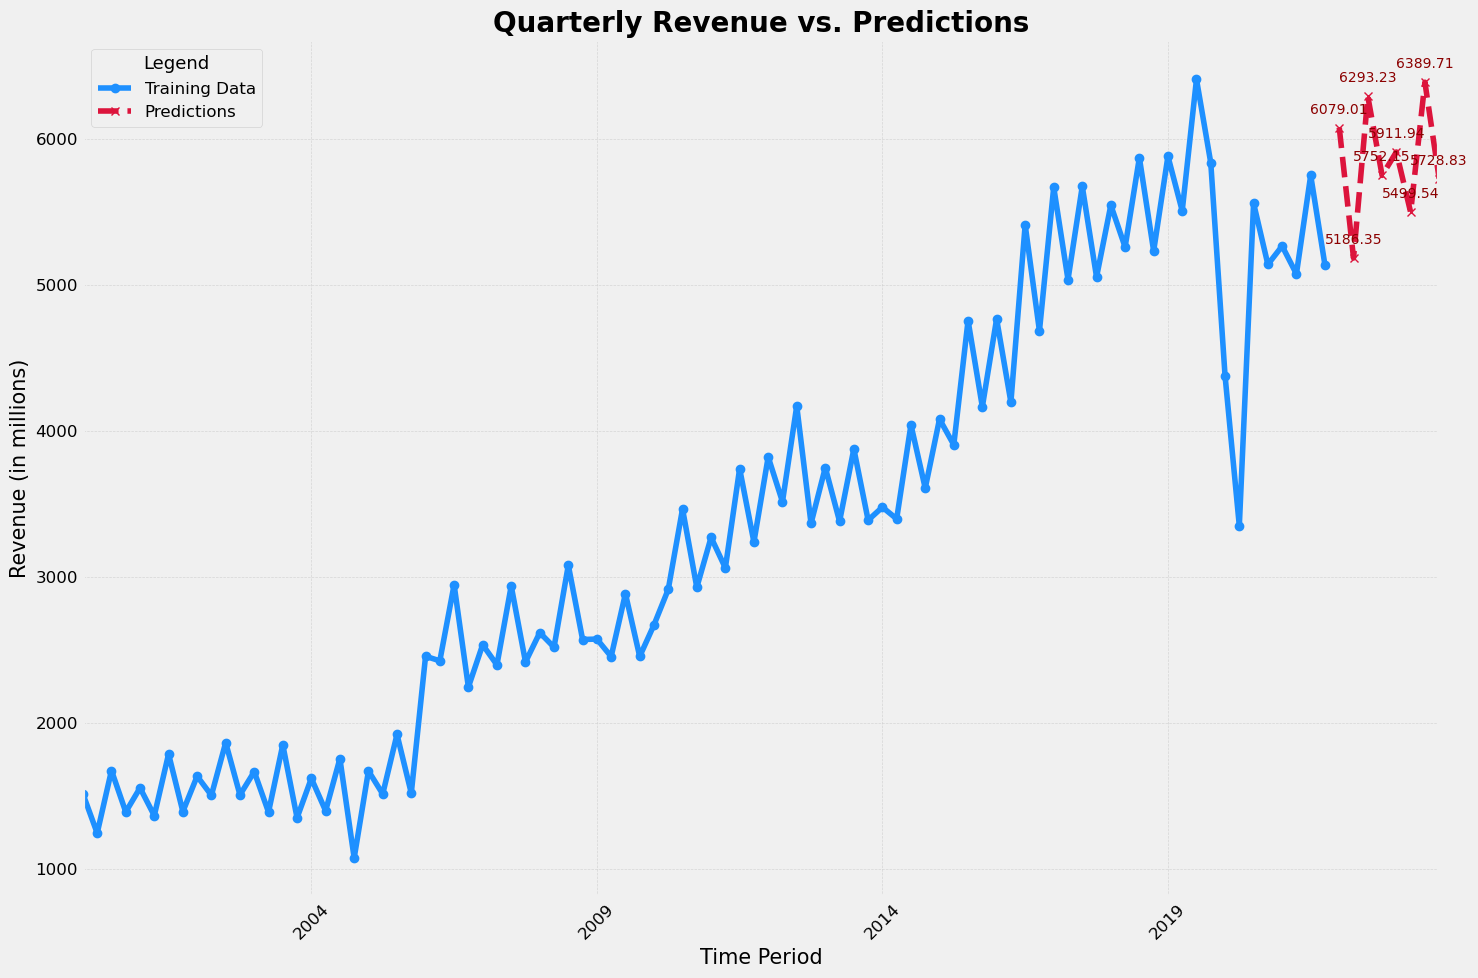

In [29]:
# First, let's set up the plot environment
plt.figure(figsize=(15, 10))

# Plotting the actual data
data["Revenue"].plot(label="Training Data", marker='o', color='dodgerblue', linestyle='-')

# Plotting the predictions
predictions.plot(label="Predictions", marker='x', color='crimson', linestyle='--')

# Enhancing the plot
plt.title('Quarterly Revenue vs. Predictions', fontsize=20, fontweight='bold')
plt.xlabel('Time Period', fontsize=15)
plt.ylabel('Revenue (in millions)', fontsize=15)
plt.legend(title="Legend", title_fontsize='13', fontsize='12')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Optional: Add annotations for significant points
for idx, value in predictions.iteritems():
    plt.annotate(f"{value:.2f}",  # formatted to two decimals
                 (idx, value), 
                 textcoords="offset points",  # how to position the text
                 xytext=(0,10),  # distance from text to points (x,y)
                 ha='center',  # horizontal alignment can be left, right or center
                 fontsize=10,
                 color='darkred')

# Show the plot
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlap
plt.show()

The detailed article on "Business Forecasting using Python" from Thecleverprogrammer.com is a comprehensive guide aimed at demonstrating the application of time series forecasting in business settings, specifically using Python programming language to predict future sales, expenditure, or revenue. Here’s a structured summary of the key components and insights from the article:

### Key Themes and Objectives
- **Business Forecasting Importance**: The article begins by emphasizing the critical role of business forecasting in enhancing profit margins and informed decision-making. Forecasting aids businesses in understanding potential future scenarios based on historical data.
- **Practical Application**: The focus of the article is a hands-on approach to forecasting Adidas's quarterly revenue using historical sales data. This case study approach provides readers with practical insights into the application of forecasting theories.

### Python and Data Science Tools
- **Python Libraries**: The use of various Python libraries is discussed, including pandas for data manipulation, matplotlib for visualization, and statsmodels for implementing statistical models like ARIMA and SARIMA, crucial for time series analysis.
- **Data Exploration and Visualization**: The article guides through the initial stages of loading and examining the data using basic Python functions, moving onto more advanced visualization with Plotly to assess trends over time.

### Methodological Approach
- **Time Series Analysis**: A significant portion of the article is dedicated to explaining time series analysis, starting with the decomposition of the series to understand underlying patterns such as seasonality, trend, and residuals.
- **Model Building**: It describes building a Seasonal ARIMA (SARIMA) model, detailing how to determine the order of the model (parameters p, d, q) using autocorrelation and partial autocorrelation plots.

### Predictive Modeling and Forecasting
- **SARIMA Model Implementation**: The article details the process of fitting a SARIMA model to the data, including interpretation of the model summary which provides insights into the effectiveness and reliability of the model.
- **Forecasting Future Trends**: Using the trained SARIMA model, the article demonstrates forecasting the next eight quarters of revenue for Adidas, showcasing the predictive power of the implemented model.

### Visualization of Results
- **Comparative Visualization**: After modeling, it visually compares historical revenue data against the forecasts to assess the model’s accuracy and provide a visual representation of future expectations.

### Summary and Conclusion
- **Utility of Business Forecasting**: The article concludes by reinforcing the importance of business forecasting in strategic planning and operational efficiency.
- **Engagement and Learning**: It invites readers to engage further by posing questions, encouraging learning through other recommended articles, and fostering a deeper understanding of data science applications in business.

### Educational Value
- **Tutorial Approach**: The step-by-step tutorial format of the article is designed to help learners and professionals alike in understanding and applying data science techniques to real-world business problems.
- **Resource Links**: Throughout the article, there are references and links to additional resources for learning how to identify model parameters and further details on ARIMA and SARIMA models, enhancing the educational value.

This article serves as both a tutorial and a case study on the application of advanced analytics in business, highlighting how Python can be used effectively for making informed business decisions based on data-driven insights.